# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [ ]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,0.0,0.0
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,0.0,0.0
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,0.0,0.0


In [ ]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options  #to get the date of different expiration time

('2024-01-04',
 '2024-01-05',
 '2024-01-08',
 '2024-01-09',
 '2024-01-10',
 '2024-01-11',
 '2024-01-12',
 '2024-01-16',
 '2024-01-17',
 '2024-01-18',
 '2024-01-19',
 '2024-01-22',
 '2024-01-23',
 '2024-01-24',
 '2024-01-25',
 '2024-01-26',
 '2024-01-29',
 '2024-01-30',
 '2024-01-31',
 '2024-02-01',
 '2024-02-02',
 '2024-02-05',
 '2024-02-06',
 '2024-02-07',
 '2024-02-09',
 '2024-02-12',
 '2024-02-16',
 '2024-02-29',
 '2024-03-15',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [ ]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [ ]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240105C01200000,2023-11-23 05:31:51+00:00,1200.0,3358.20,3544.4,3562.1,0.0,0.0,24.0,24,11.773684,True,REGULAR,USD
1,SPXW240105C01400000,2023-12-18 19:24:08+00:00,1400.0,3350.52,3308.7,3310.1,0.0,0.0,2.0,5,7.075441,True,REGULAR,USD
2,SPXW240105C02000000,2023-11-23 05:31:50+00:00,2000.0,2563.50,2746.4,2763.3,0.0,0.0,4.0,4,7.713196,True,REGULAR,USD
3,SPXW240105C02200000,2023-11-23 05:31:50+00:00,2200.0,2364.90,2546.3,2563.0,0.0,0.0,8.0,8,6.949708,True,REGULAR,USD
4,SPXW240105C02400000,2023-12-20 15:28:21+00:00,2400.0,2376.35,2309.1,2310.5,0.0,0.0,2.0,4,4.134526,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [ ]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(df['Close']/df['Close'].shift(1))
    log_return = log_return[1:]
    daily_vol = np.std(log_return)
    vol = daily_vol*np.sqrt(252)

    return vol

In [ ]:
vol = annual_vol(df)
vol

0.19474339560181592

# **BLACK-SCHOLES MODEL**


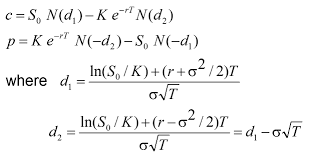

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [ ]:
def euro_vanilla(S, K, T, r, sigma, option):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """
    d1=(np.log(S/K)+(r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2=(np.log(S/K)+(r-(sigma**2)/2)*T)/(sigma*np.sqrt(T))

    if(option=='call'):
      premium_c = S*ss.norm.cdf(d1) - K*np.exp(-1*r*T)*ss.norm.cdf(d2)
      return premium_c
    elif(option=='put'):
      premium_p = K*np.exp(-1*r*T)*ss.norm.cdf(-1*d2) - S*ss.norm.cdf(-1*d1)
      return premium_p

In [ ]:
N = 100
T = 1.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol, option='call')
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
1200.0,3504.810060
1400.0,3304.810060
2000.0,2704.810060
2200.0,2504.810061
2400.0,2304.810061


In [ ]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
1200.0,3358.20
1400.0,3350.52
2000.0,2563.50
2200.0,2364.90
2400.0,2376.35


In [ ]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
1200.0,3504.810060,3358.20
1400.0,3304.810060,3350.52
2000.0,2704.810060,2563.50
2200.0,2504.810061,2364.90
2400.0,2304.810061,2376.35
2600.0,2104.810061,2191.55
3000.0,1704.810061,1751.66
3400.0,1304.810062,1379.40
3450.0,1254.810062,1314.54
3750.0,954.810062,1042.92


<Axes: >

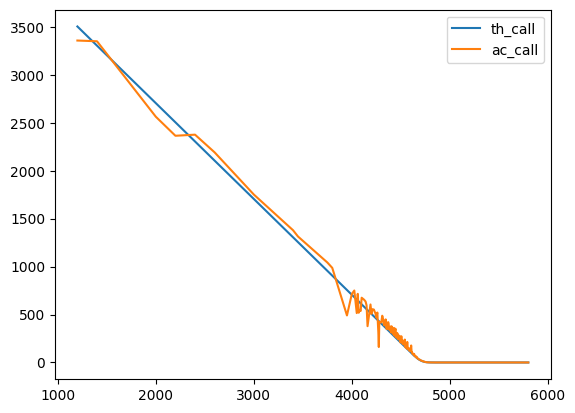

In [ ]:
call.plot() #plotting the actual and theoretical call prices

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
1800.0,0.0
2000.0,0.0
2200.0,0.0
2400.0,0.0
2600.0,0.0


In [ ]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
1800.0,0.05
2000.0,0.05
2200.0,0.05
2400.0,0.07
2600.0,0.03


In [ ]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
5100.0,395.189935,352.55
5110.0,405.189935,380.78
5125.0,420.189935,346.10
5175.0,470.189935,427.50
5200.0,495.189935,531.00
5250.0,545.189935,452.00
5300.0,595.189935,504.55
5400.0,695.189935,730.00
5600.0,895.189935,929.50
5800.0,1095.189935,1128.60


<Axes: >

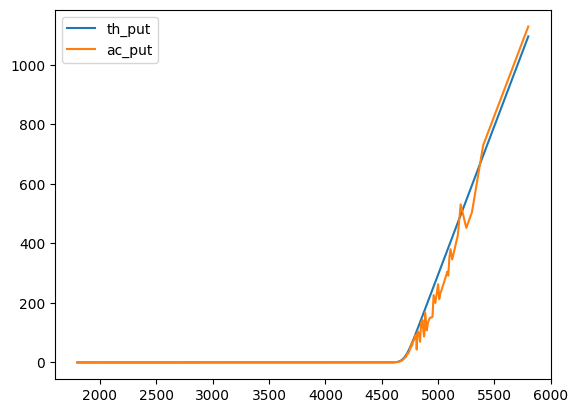

In [ ]:
put.plot()